<a href="https://colab.research.google.com/github/RRAJ644/Salary-Prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/datasets/survey_results_public.csv'
data = pd.read_csv(path)

In [ ]:
data.shape

(49123, 170)

In [ ]:
print(data['Industry'].dtype)
data['Industry'].isnull().sum()

object


np.int64(15516)

In [ ]:
relevant_columns = [
    'ConvertedCompYearly',
    'WorkExp',
    'YearsCode',
    'DevType',
    'ICorPM',
    'Country',
    'OrgSize',
    'RemoteWork',
    'EdLevel',
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'WebframeHaveWorkedWith'
]
all_cols_for_initial_prep = ['ResponseId'] + relevant_columns
data = data[all_cols_for_initial_prep]
print(f"Original Row Count: {len(data)}")
data.dropna(subset=['ConvertedCompYearly'], inplace=True)
print(f"Row Count after dropping null salaries: {len(data)}")

Original Row Count: 49123
Row Count after dropping null salaries: 23928


In [ ]:
data.columns.tolist()

['ResponseId',
 'ConvertedCompYearly',
 'WorkExp',
 'YearsCode',
 'DevType',
 'ICorPM',
 'Country',
 'OrgSize',
 'RemoteWork',
 'EdLevel',
 'LanguageHaveWorkedWith',
 'DatabaseHaveWorkedWith',
 'WebframeHaveWorkedWith']

In [ ]:
data.shape

(23928, 13)

In [ ]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 23928 entries, 0 to 49017
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              23928 non-null  int64  
 1   ConvertedCompYearly     23928 non-null  float64
 2   WorkExp                 23450 non-null  float64
 3   YearsCode               23819 non-null  float64
 4   DevType                 23928 non-null  object 
 5   ICorPM                  20851 non-null  object 
 6   Country                 23928 non-null  object 
 7   OrgSize                 21188 non-null  object 
 8   RemoteWork              21080 non-null  object 
 9   EdLevel                 23911 non-null  object 
 10  LanguageHaveWorkedWith  22113 non-null  object 
 11  DatabaseHaveWorkedWith  18468 non-null  object 
 12  WebframeHaveWorkedWith  16600 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 2.6+ MB


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cols_with_null = data.columns[data.isnull().any()].tolist()

for col in cols_with_null:
    print(f"{col}: {data[col].isnull().sum()} null values")

WorkExp: 478 null values
YearsCode: 109 null values
ICorPM: 3077 null values
OrgSize: 2740 null values
RemoteWork: 2848 null values
EdLevel: 17 null values
LanguageHaveWorkedWith: 1815 null values
DatabaseHaveWorkedWith: 5460 null values
WebframeHaveWorkedWith: 7328 null values


In [ ]:
data.head()

ResponseId  ConvertedCompYearly  WorkExp  YearsCode               DevType  \
0           1              61256.0      8.0       14.0     Developer, mobile   
1           2             104413.0      2.0       10.0   Developer, back-end   
2           3              53061.0     10.0       12.0  Developer, front-end   
3           4              36197.0      4.0        5.0   Developer, back-end   
4           5              60000.0     21.0       22.0   Engineering manager   

                   ICorPM      Country                   OrgSize  \
0          People manager      Ukraine        20 to 99 employees   
1  Individual contributor  Netherlands      500 to 999 employees   
2                     NaN      Ukraine                       NaN   
3  Individual contributor      Ukraine  10,000 or more employees   
4                     NaN      Ukraine                       NaN   

                                          RemoteWork  \
0                                             Remote   
1  Hybrid (some in-person, leans heavy to flexibi...   
2                                                NaN   
3                                             Remote   
4                                                NaN   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1              Associate degree (A.A., A.S., etc.)   
2     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                              LanguageHaveWorkedWith  \
0                   Bash/Shell (all shells);Dart;SQL   
1                                               Java   
2                Dart;HTML/CSS;JavaScript;TypeScript   
3                                    Java;Kotlin;SQL   
4  C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...   

                              DatabaseHaveWorkedWith  \
0                         Cloud Firestore;PostgreSQL   
1                                   Dynamodb;MongoDB   
2                           MongoDB;MySQL;PostgreSQL   
3                                                NaN   
4  Elasticsearch;Microsoft SQL Server;MySQL;Oracl...   

                      WebframeHaveWorkedWith  
0                                        NaN  
1                                Spring Boot  
2                      Next.js;Node.js;React  
3                                Spring Boot  
4  Angular;ASP.NET;ASP.NET Core;Flask;jQuery

In [ ]:
data.describe()

ResponseId  ConvertedCompYearly       WorkExp     YearsCode
count  23928.000000         2.392800e+04  23450.000000  23819.000000
mean   22508.812688         1.017916e+05     13.699147     17.710735
std    14358.761290         4.619345e+05     10.129353     11.062428
min        1.000000         1.000000e+00      1.000000      1.000000
25%    10355.750000         3.817100e+04      6.000000      9.000000
50%    20993.000000         7.538350e+04     11.000000     15.000000
75%    35489.250000         1.206302e+05     20.000000     25.000000
max    49018.000000         5.000000e+07    100.000000    100.000000

In [ ]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col] = data[col].fillna(data[col].median())
    else:
        data[col] = data[col].fillna('Unknown')


In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
salary = data['ConvertedCompYearly']
print(salary.describe())
print(f"Median Salary: ${salary.median():,.0f}")
print(f"95th Percentile: ${salary.quantile(0.95):,.0f}")
print("-" * 25)

count    2.392800e+04
mean     1.017916e+05
std      4.619345e+05
min      1.000000e+00
25%      3.817100e+04
50%      7.538350e+04
75%      1.206302e+05
max      5.000000e+07
Name: ConvertedCompYearly, dtype: float64
Median Salary: $75,384
95th Percentile: $232,029
-------------------------


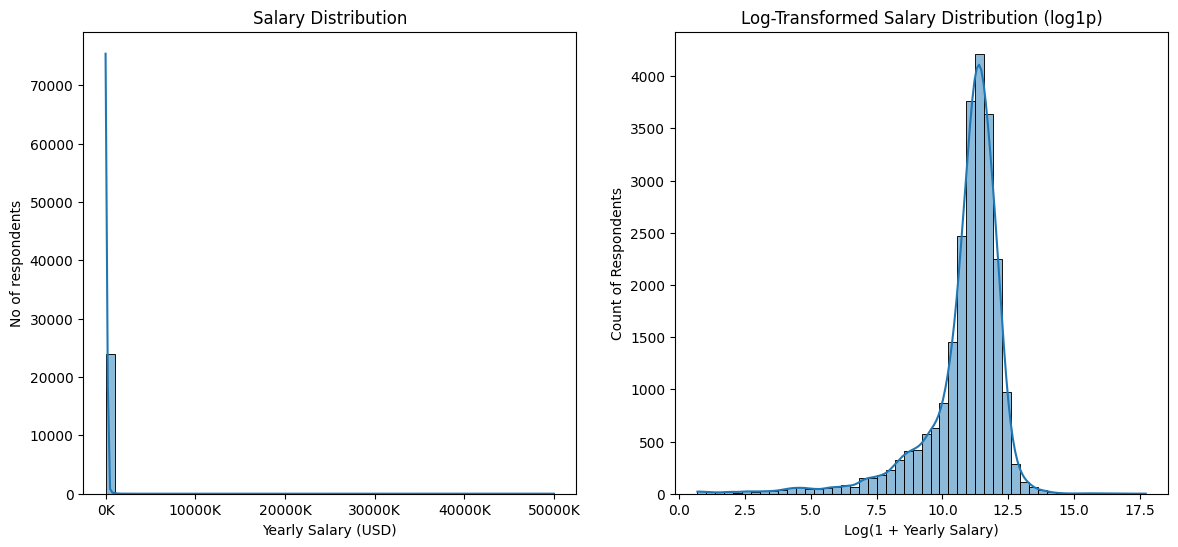

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.histplot(salary, bins=50, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("No of respondents")
plt.ticklabel_format(style='plain', axis='x')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))


plt.subplot(1, 2, 2)
sns.histplot(np.log1p(salary), bins=50, kde=True)
plt.title('Log-Transformed Salary Distribution (log1p)')
plt.xlabel('Log(1 + Yearly Salary)')
plt.ylabel('Count of Respondents')
plt.show()


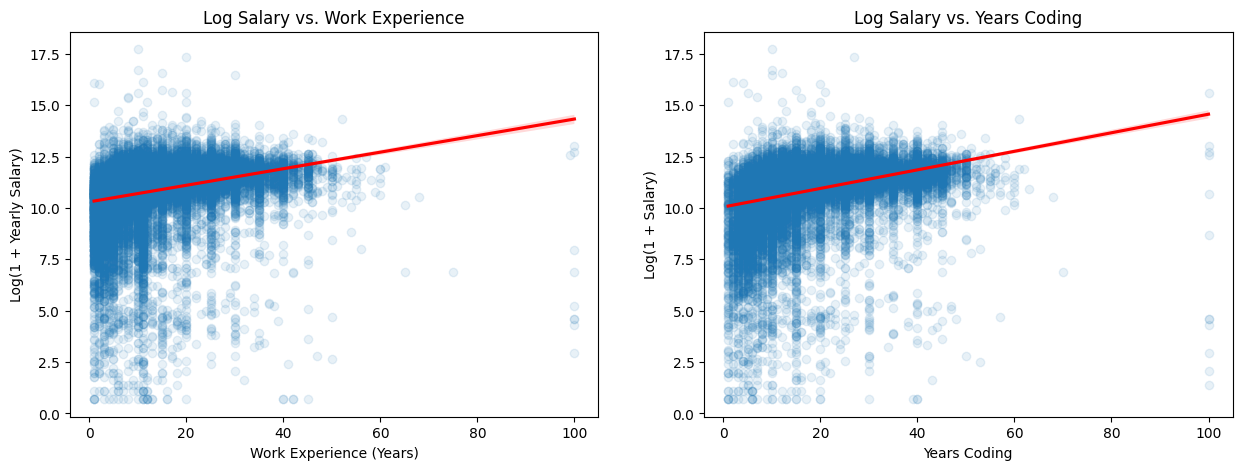

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)

sns.regplot(x='WorkExp', y=np.log1p(data['ConvertedCompYearly']), data=data, scatter_kws={'alpha':0.1}, line_kws={'color':'red'})

plt.title('Log Salary vs. Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Log(1 + Yearly Salary)')


plt.subplot(1, 2, 2)
sns.regplot(x='YearsCode', y=np.log1p(data['ConvertedCompYearly']), data=data, scatter_kws={'alpha':0.1}, line_kws={"color": "red"})
plt.title('Log Salary vs. Years Coding')
plt.xlabel('Years Coding')
plt.ylabel('Log(1 + Salary)')

plt.show()

In [ ]:
print("Correlation (WorkExp vs. Salary): ", data['WorkExp'].corr(data['ConvertedCompYearly']))
print("Correlation (YearsCode vs. Salary):",  data['YearsCode'].corr(data['ConvertedCompYearly']))

Correlation (WorkExp vs. Salary):  0.0541711787183667
Correlation (YearsCode vs. Salary): 0.05783286632979132


/tmp/ipython-input-1759834315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_salary.values, y=country_salary.index, palette='viridis')


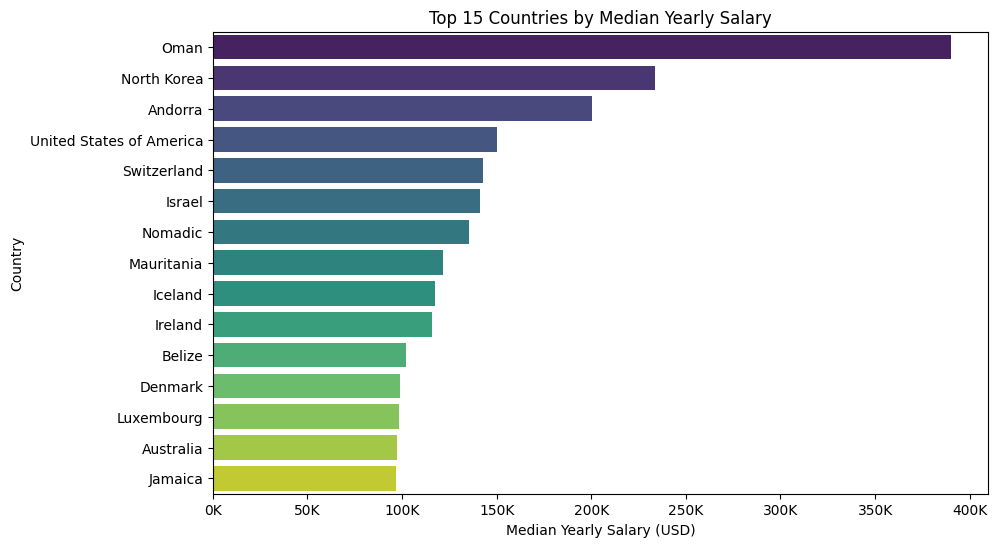

In [ ]:
country_salary = data.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))

sns.barplot(x=country_salary.values, y=country_salary.index, palette='viridis')
plt.title('Top 15 Countries by Median Yearly Salary')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Country')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

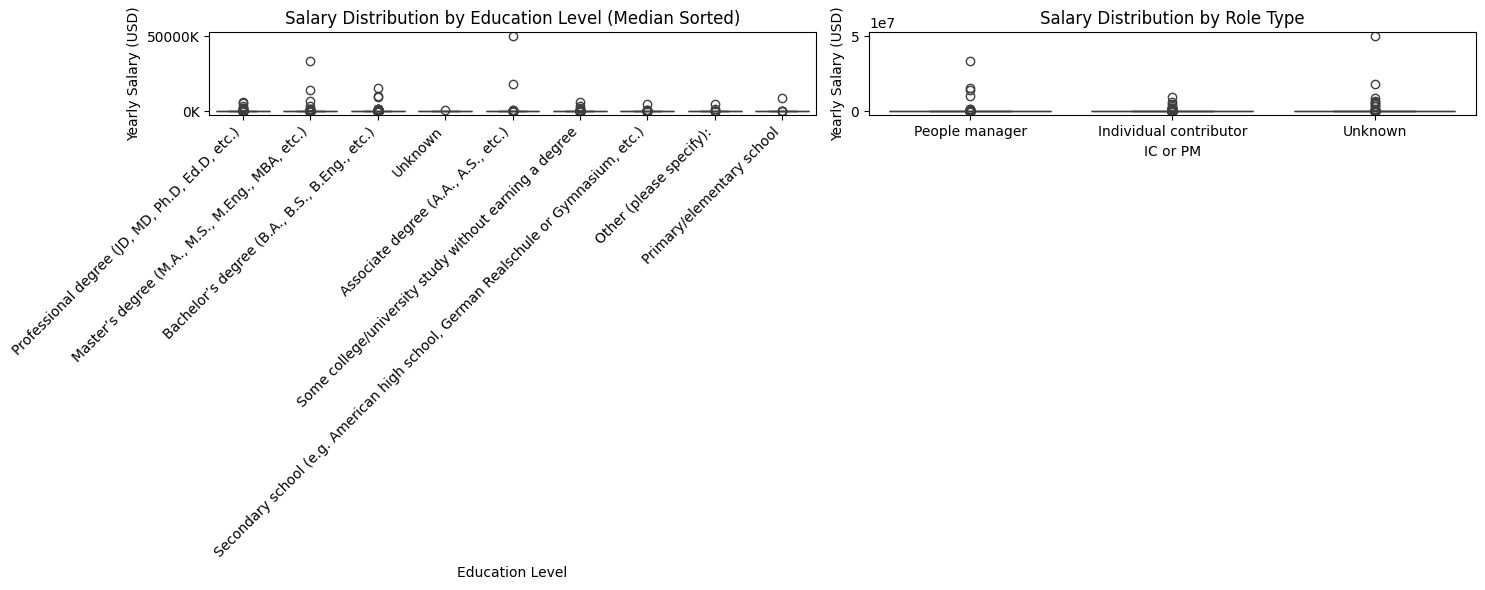

--- Median Salary by Education Level (USD) ---
EdLevel
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        $87,011
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       $80,000
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          $75,744
Unknown                                                                               $73,375
Associate degree (A.A., A.S., etc.)                                                   $69,751
Some college/university study without earning a degree                                $66,034
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    $52,207
Other (please specify):                                                               $49,943
Primary/elementary school                                                             $46,646
Name: ConvertedCompYearly, dtype: object

--- Median Salary by Role Type (USD) ---
ICorPM
People ma

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=data, order=data.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False).index)

plt.title('Salary Distribution by Education Level (Median Sorted)')
plt.xlabel('Education Level')
plt.ylabel('Yearly Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.subplot(1, 2, 2)
sns.boxplot(x='ICorPM', y='ConvertedCompYearly', data=data)
plt.title('Salary Distribution by Role Type')
plt.xlabel('IC or PM')
plt.ylabel('Yearly Salary (USD)')

plt.tight_layout()
plt.show()

print("--- Median Salary by Education Level (USD) ---")
ed_median = data.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False)
print(ed_median.apply(lambda x: f'${x:,.0f}'))

print("\n--- Median Salary by Role Type (USD) ---")
role_median = data.groupby('ICorPM')['ConvertedCompYearly'].median().sort_values(ascending=False)
print(role_median.apply(lambda x: f'${x:,.0f}'))

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np


ed_levels = data['EdLevel'].unique()

ed_groups = [
    data[data['EdLevel'] == level]['ConvertedCompYearly'].astype(float).values
    for level in ed_levels
]

ed_groups = [group for group in ed_groups if group.size > 0]

f_statistic, p_value = stats.f_oneway(*ed_groups)

print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.20f}")

F-Statistic: 3.91
P-Value: 0.00012729518239242715


In [ ]:
data['LogConvertedCompYearly'] = np.log1p(data['ConvertedCompYearly'])
print(data['LogConvertedCompYearly'])

0        11.022833
1        11.556119
2        10.879216
3        10.496759
4        11.002117
5        11.695255
6         8.738896
7        11.184435
8        11.156265
9         8.594339
10       11.092732
11        9.575053
12        7.003065
16        9.696033
22       11.379406
25       11.598314
26       11.997953
27       12.253166
28       11.264477
29       12.230770
31       12.429220
33       12.072547
35       11.463031
37       11.599112
38       11.420986
39       11.918397
40       11.512925
41       12.506181
42       12.429220
43       10.687640
45       11.301797
47       10.249769
48       11.870250
49       11.676693
50       11.230708
51       11.304806
52       11.065231
53       11.925042
54       11.332985
55       10.745206
56        8.699681
58       11.047201
59       11.925816
60       11.116767
61       12.192106
63       12.409018
64        9.605822
65        1.386294
67       11.231530
68       12.066943
69       12.258613
72       11.918397
73       11.

In [ ]:
edlevel_median_log_salary = data.groupby('EdLevel')['LogConvertedCompYearly'].median().sort_values()
new_education_order=edlevel_median_log_salary.index.tolist()
data_driven_mapping = {level: i for i, level in enumerate(new_education_order)}
data['EdLevel_Encoded_Automated'] = data['EdLevel'].map(data_driven_mapping)
print(data['EdLevel_Encoded_Automated'])

0        7
1        4
2        6
3        6
4        7
5        7
6        3
7        8
8        6
9        7
10       7
11       6
12       6
16       3
22       3
25       6
26       7
27       6
28       8
29       7
31       6
33       6
35       6
37       7
38       7
39       6
40       8
41       6
42       7
43       7
45       8
47       6
48       6
49       7
50       7
51       6
52       6
53       3
54       6
55       7
56       8
58       3
59       6
60       6
61       6
63       6
64       3
65       6
67       6
68       6
69       8
72       6
73       7
74       7
75       7
76       3
77       6
79       7
81       6
82       7
83       6
84       7
85       7
87       6
88       6
90       6
92       6
93       6
95       8
96       3
97       3
99       2
100      7
101      6
102      2
103      6
105      6
106      6
108      7
109      6
110      6
111      6
113      6
117      7
118      3
119      7
120      6
121      7
122      6
123      2
125      6

In [ ]:
orgsize_median_log_salary = data.groupby('OrgSize')['LogConvertedCompYearly'].median().sort_values()
new_orgsize_order = orgsize_median_log_salary.index.tolist()
data_driven_mapping = {level: i for i, level in enumerate(new_orgsize_order)}
data['OrgSize_Encoded_Automated'] = data['OrgSize'].map(data_driven_mapping)
print(data['OrgSize_Encoded_Automated'])

0        3
1        6
2        4
3        9
4        4
5        4
6        4
7        1
8        8
9        3
10       5
11       5
12       4
16       4
22       5
25       4
26       4
27       7
28       1
29       6
31       5
33       8
35       7
37       9
38       1
39       5
40       6
41       1
42       9
43       5
45       3
47       5
48       3
49       7
50       1
51       5
52       5
53       3
54       5
55       8
56       8
58       9
59       3
60       7
61       4
63       7
64       1
65       3
67       7
68       0
69       3
72       5
73       1
74       4
75       5
76       4
77       4
79       3
81       3
82       3
83       6
84       1
85       8
87       5
88       1
90       3
92       8
93       4
95       7
96       5
97       7
99       1
100      3
101      1
102      5
103      3
105      5
106      1
108      4
109      3
110      1
111      1
113      3
117      8
118      1
119      7
120      6
121      0
122      7
123      5
125      1

In [ ]:
country_counts = data['Country'].value_counts()
country_median_salary = data.groupby('Country')['LogConvertedCompYearly'].median()

COUNTRY_COUNT_THRESHOLD = 1000
COUNTRY_SALARY_THRESHOLD = 150000
country_stats = data.groupby('Country')['LogConvertedCompYearly'].agg(['size', 'median'])

top_countries = country_stats[
    (country_stats['size'] >= COUNTRY_COUNT_THRESHOLD) |
    (country_stats['median'] >= np.log1p(COUNTRY_SALARY_THRESHOLD))
].index.tolist()

def simplify_country(country):
  if country in top_countries:
    return country
  else:
    return 'Other'

data['Country_Simplified'] = data['Country'].apply(simplify_country)
print(data['Country_Simplified'])

0                                                    Other
1                                                    Other
2                                                    Other
3                                                    Other
4                                                    Other
5                                                    Other
6                                                    Other
7                                                    Other
8                                                    Other
9                                                    Other
10                                                   Other
11                                                   Other
12                                                   Other
16                                                   Other
22                                United States of America
25       United Kingdom of Great Britain and Northern I...
26                                                   Oth

In [ ]:
ohe_features = ['ICorPM', 'RemoteWork', 'Country_Simplified']
data = pd.get_dummies(data, columns=ohe_features, prefix=ohe_features, dummy_na=False)

In [ ]:
multi_select_features = ['DevType', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'WebframeHaveWorkedWith']

for feature in multi_select_features:
    s = data[feature].str.split(';').explode().str.strip()
    unique_values = s.dropna().unique()

    for value in unique_values:
        if value and value != 'Unknown' and isinstance(value, str):
            new_col_name = f'{feature}_{value.replace(" ", "_").replace("/", "_").replace("-", "_")}'
            data[new_col_name] = data[feature].apply(lambda x: 1 if isinstance(x, str) and value in x else 0)
    data[feature] = data[feature].apply(lambda x: x if isinstance(x, str) else 'Unknown')


print(f"Total columns after encoding: {data.shape[1]}")

/tmp/ipython-input-913350741.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[new_col_name] = data[feature].apply(lambda x: 1 if isinstance(x, str) and value in x else 0)
/tmp/ipython-input-913350741.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[new_col_name] = data[feature].apply(lambda x: 1 if isinstance(x, str) and value in x else 0)
/tmp/ipython-input-913350741.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

Total columns after encoding: 162


/tmp/ipython-input-913350741.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[new_col_name] = data[feature].apply(lambda x: 1 if isinstance(x, str) and value in x else 0)
/tmp/ipython-input-913350741.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[new_col_name] = data[feature].apply(lambda x: 1 if isinstance(x, str) and value in x else 0)
/tmp/ipython-input-913350741.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [ ]:
columns_to_drop= [
    'ConvertedCompYearly',
    'EdLevel',
    'OrgSize',
    'Country',
    'Country_Simplified',
    'ICorPM',
    'RemoteWork',
    'DevType',
    'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith',
    'WebframeHaveWorkedWith'
]

data = data.drop(columns=columns_to_drop, errors='ignore')

print(f"Total columns after dropping: {data.shape[1]}")



Total columns after dropping: 154


In [ ]:
data.shape

(23928, 154)

In [ ]:
data.head(10)

ResponseId  WorkExp  YearsCode  LogConvertedCompYearly  \
0           1      8.0       14.0               11.022833   
1           2      2.0       10.0               11.556119   
2           3     10.0       12.0               10.879216   
3           4      4.0        5.0               10.496759   
4           5     21.0       22.0               11.002117   
5           6     15.0       20.0               11.695255   
6           7      9.0       13.0                8.738896   
7           8     22.0       30.0               11.184435   
8           9      9.0       15.0               11.156265   
9          10      7.0       10.0                8.594339   

   EdLevel_Encoded_Automated  OrgSize_Encoded_Automated  \
0                          7                          3   
1                          4                          6   
2                          6                          4   
3                          6                          9   
4                          7                          4   
5                          7                          4   
6                          3                          4   
7                          8                          1   
8                          6                          8   
9                          7                          3   

   ICorPM_Individual contributor  ICorPM_People manager  ICorPM_Unknown  \
0                          False                   True           False   
1                           True                  False           False   
2                          False                  False            True   
3                           True                  False           False   
4                          False                  False            True   
5                          False                  False            True   
6                          False                  False            True   
7                          False                   True           False   
8                           True                  False           False   
9                           True                  False           False   

   RemoteWork_Hybrid (some in-person, leans heavy to flexibility)  \
0                                              False                
1                                               True                
2                                              False                
3                                              False                
4                                              False                
5                                              False                
6                                              False                
7                                              False                
8                                              False                
9                                              False                

   RemoteWork_Hybrid (some remote, leans heavy to in-person)  \
0                                              False           
1                                              False           
2                                              False           
3                                              False           
4                                              False           
5                                              False           
6                                              False           
7                                              False           
8                                              False           
9                                              False           

   RemoteWork_In-person  RemoteWork_Remote  RemoteWork_Unknown  \
0                 False               True               False   
1                 False              False               False   
2                 False              False                True   
3                 False               True               False   
4                 False              False                Tr